In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [138]:
import numpy as np
import pandas as pd
import math

In [139]:
train = pd.read_csv('TMERC.txt',header = None)
train

,0,1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [140]:
train = np.array(train)
train

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [141]:
class1 = []
class2 = []
#prior w1, w2
w1 = .5 
w2 = .5
d = train.ndim # (d = 2)

In [142]:
sigma1 = np.array([[0.25,0.3],[0.3,1]])
sigma2 = np.array([[0.5,0],[0,0.5]])

In [143]:

mean1 = np.array([0,0])
mean2 = np.array([2,2])

In [144]:
# for class 1
x1 = []
y1 = []

# for class 2
x2 = []
y2 = []

In [150]:
n = (train.size)/2 # 12/2 = 6

temp = []

for i in range(int(n)):
    g1 = -0.5*(np.dot(np.dot(train[i] - mean1,np.linalg.inv(sigma1)), (train[i] - mean1).T)) - (d/2)*np.log(2*np.pi) - (0.5 * np.log(np.linalg.det(sigma1))) + w1
    g2 = -0.5*(np.dot(np.dot(train[i] - mean2,np.linalg.inv(sigma2)), (train[i] - mean2).T)) - (d/2)*np.log(2*np.pi) - (0.5 * np.log(np.linalg.det(sigma2))) + w2
    #print(g1,"    ",g2)
    a = train[i][0]
    b = train[i][1]
    if g1 > g2:
        x1.append(a)
        y1.append(b) 
        temp.append(a)
        temp.append(b)
        temp.append(1)
        class1.append(temp)
    else:
        x2.append(a)
        y2.append(b)
        temp.append(a)
        temp.append(b)
        temp.append(2)
        class2.append(temp)
    temp = []

In [151]:
print(x1,y1)
print(x2,y2)

[1.0, 1.0, 0.0] [1.0, -1.0, 2.0]
[4.0, -2.0, 2.0] [5.0, 2.5, -3.0]


In [152]:

print("Class 1 : ", class1)
print("Class 2 : ",class2)


Class 1 :  [[1.0, 1.0, 1], [1.0, -1.0, 1], [0.0, 2.0, 1]]
Class 2 :  [[4.0, 5.0, 2], [-2.0, 2.5, 2], [2.0, -3.0, 2]]


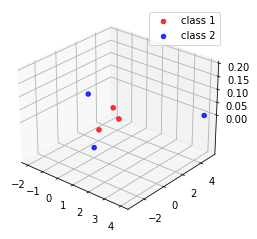

In [158]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')


# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -50)


ax.scatter(x1,y1,0, color = 'r',marker = "o", alpha = 0.8,  label = 'class 1')
ax.scatter(x2,y2,0, color = 'b',marker = "o", alpha = 0.8,  label = 'class 2')

plt.legend()
plt.show()

In [153]:
'''
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 60)
y = np.linspace(-6, 6, 60)

X, Y = np.meshgrid(x1, y1)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()
'''

"\nfrom mpl_toolkits import mplot3d\nimport numpy as np\nimport matplotlib.pyplot as plt\ndef f(x, y):\n    return np.sin(np.sqrt(x ** 2 + y ** 2))\n\nx = np.linspace(-6, 6, 60)\ny = np.linspace(-6, 6, 60)\n\nX, Y = np.meshgrid(x1, y1)\nZ = f(X, Y)\n\nfig = plt.figure()\nax = plt.axes(projection='3d')\nax.contour3D(X, Y, Z, 50, cmap='binary')\nax.set_xlabel('x')\nax.set_ylabel('y')\nax.set_zlabel('z')\nax.set_title('3D contour')\nplt.show()\n"

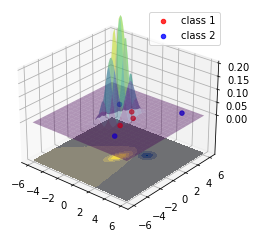

In [172]:
###########
## Reference : https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/?fbclid=IwAR1CrhQe7bpGl-LICNjpTkArYxPmsNLDal7kZ67RTq_DAkvWcuSYUtg5DFQ
###########

N = 60
X = np.linspace(-6, 6, 60) ## range -6 to +6 60 times
Y = np.linspace(-6, 6, 60)
X, Y = np.meshgrid(X, Y) #convert it to numpyarray
#print(X)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariateGaussian(pos, mu, Sigma):
    n = mu.shape[0] # dimension
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z1 = multivariateGaussian(pos, mean1, sigma1)
Z2 = multivariateGaussian(pos, mean2, sigma2)


# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, alpha = 0.4 ,antialiased=True,cmap=cm.viridis)
#ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, alpha = 0.4 ,antialiased=True,cmap=cm.viridis)

cset1 = ax.contourf(X, Y, Z1, zdir='z', offset=-0.15, cmap=cm.viridis)
#cset2 = ax.contourf(X, Y, Z2, zdir='z', offset=-0.15, cmap=cm.viridis)

#decision boundary
db = ax.contourf(X, Y, (Z1 - Z2), zdir='z', offset=-0.15, cmap=cm.cividis)


# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -50)


ax.scatter(x1,y1,0, color = 'r',marker = "o", alpha = 0.8,  label = 'class 1')
ax.scatter(x2,y2,0, color = 'b',marker = "o", alpha = 0.8,  label = 'class 2')

plt.legend()
plt.show()


In [ ]:
'''
X = np.linspace(-6, 6, 60) ## range -6 to +6 60 times
Y = np.linspace(-6, 6, 60)
X, Y = np.meshgrid(X, Y)
X
'''